In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/trab1/cursos-prouni.csv - cursos-prouni-2018-tratados.csv.csv')

In [5]:
list_drop_columns = ['grau',
                     'turno',
                     'curso_busca',
                     'curso_id',
                     'bolsa_parcial_ampla',
                     'bolsa_parcial_cotas',
                     'bolsa_integral_ampla',
                     'bolsa_integral_cotas',
                     'mensalidade',
                     'cidade_busca',
                     'uf_busca',
                    'universidade_nome',
                     ]

df_aux = df.drop(columns=list_drop_columns)

In [6]:
df_aux.head()

,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26
2,Medicina,741.06,729.02,730.98,722.82
3,Medicina,741.36,739.90,760.80,715.10
4,Medicina,756.46,737.88,747.14,717.60


ATRIBUTOS:

nome: Nome do curso

nota_integral_ampla: Nota da categoria de bolsa integral de ampla concorrência

nota_integral_cotas: Nota da categoria de bolsa integral com aplicação de cotas

nota_parcial_ampla: Nota da categoria de bolsa parcial de ampla concorrência

nota_parcial_cotas: Nota da categoria de bolsa parcial com aplicação de cotas

In [7]:
#Exploração e tratamento dos dados
df_aux.head(2)

,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26


In [8]:
df_aux.rename(columns={'nome': 'nome_do_curso'}, inplace=True)

In [9]:
df_aux.head(3)

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26
2,Medicina,741.06,729.02,730.98,722.82


In [10]:
# valores NaN
df_aux.isnull().sum()

nome_do_curso          0
nota_integral_ampla    0
nota_integral_cotas    0
nota_parcial_ampla     0
nota_parcial_cotas     0
dtype: int64

In [11]:
# tipos de atributos
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df_aux.dtypes

nome_do_curso           object
nota_integral_ampla    float64
nota_integral_cotas    float64
nota_parcial_ampla     float64
nota_parcial_cotas     float64
dtype: object

In [12]:
# Dados estatísticos

df_aux.describe()

,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
count,2203.000000,2203.000000,2203.000000,2203.000000
mean,599.380390,574.097921,547.297204,521.452964
std,53.194117,59.868058,58.971101,56.371352
min,450.000000,450.000000,450.000000,450.000000
25%,569.530000,542.290000,507.260000,450.000000
50%,602.040000,583.320000,555.240000,526.540000
75%,634.550000,614.340000,588.140000,563.600000
max,781.200000,792.240000,776.360000,768.340000


Outliers

In [13]:
import plotly.express as px

In [15]:
boxplot = px.box(df_aux, y="nota_integral_ampla")
boxplot.show()

In [16]:
boxplot = px.box(df_aux, y="nota_integral_cotas")
boxplot.show()

In [18]:
boxplot = px.box(df_aux, y="nota_parcial_ampla")
boxplot.show()

In [19]:
boxplot = px.box(df_aux, y="nota_parcial_cotas")
boxplot.show()

Pré-processamento

In [20]:
df_aux.head(2)

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26


In [21]:
#excluir nome do curso
df2 = df_aux.drop(labels = 'nome_do_curso', axis = 1)

In [22]:
df2.head(2)

,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,739.62,738.08,738.96,718.64
1,758.32,723.94,734.92,711.26


In [23]:
#escalonamento
from sklearn.preprocessing import StandardScaler

In [24]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [25]:
df2_esc

array([[ 2.63697298,  2.73967981,  3.25085185,  3.49879504],
       [ 2.98859543,  2.50344014,  3.18232816,  3.36784775],
       [ 2.66404979,  2.58831267,  3.11550061,  3.57296301],
       ...,
       [-1.91042663, -1.12469332, -0.65839058, -1.23624466],
       [-2.68361995, -2.07332759, -1.65028791, -1.26782816],
       [-1.24177988, -2.07332759, -1.65028791, -1.26782816]])

K Means com PCA

In [26]:
df2_esc

array([[ 2.63697298,  2.73967981,  3.25085185,  3.49879504],
       [ 2.98859543,  2.50344014,  3.18232816,  3.36784775],
       [ 2.66404979,  2.58831267,  3.11550061,  3.57296301],
       ...,
       [-1.91042663, -1.12469332, -0.65839058, -1.23624466],
       [-2.68361995, -2.07332759, -1.65028791, -1.26782816],
       [-1.24177988, -2.07332759, -1.65028791, -1.26782816]])

In [27]:
df2_esc.shape

(2203, 4)

In [28]:
#componentes principais
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components = 2)

In [30]:
df2_pca = pca.fit_transform(df2_esc)

In [31]:
df2_pca

array([[ 6.0642945 , -0.66716556],
       [ 6.02300941, -0.53037405],
       [ 5.97211217, -0.7011158 ],
       ...,
       [-2.4658188 , -0.5579454 ],
       [-3.83675733, -0.89844091],
       [-3.11441902, -0.22451096]])

In [32]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.8102535 , 0.09414325])

In [33]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.9043967496213998

In [34]:
#elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_pca)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

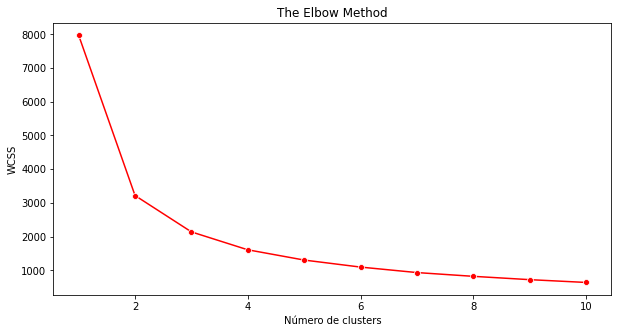

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

Agrupamento

In [37]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [38]:
kmeans_fit = kmeans.fit(df2_pca)

In [39]:
#coordenadas dos centróides
centroides = kmeans_fit.cluster_centers_
centroides

array([[ 2.18629771, -0.05448534],
       [-2.93673239, -0.38893765],
       [ 0.45506005, -0.08585784],
       [-1.25822545,  0.4280256 ]])

In [40]:
#classificação dos dados
classificacao = kmeans_fit.labels_
classificacao

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [41]:
classificacao[2]

0

In [42]:
import plotly.express as px
import plotly.graph_objects as go

In [43]:
graf1 = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [44]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,0
1,0
2,0
3,0
4,0
...,...
2198,1
2199,1
2200,1
2201,1


In [45]:
df_aux = pd.concat([df_aux, agrupamento],axis=1)
df_aux

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
0,Medicina,739.62,738.08,738.96,718.64,0
1,Medicina,758.32,723.94,734.92,711.26,0
2,Medicina,741.06,729.02,730.98,722.82,0
3,Medicina,741.36,739.90,760.80,715.10,0
4,Medicina,756.46,737.88,747.14,717.60,0
...,...,...,...,...,...,...
2198,Teologia,584.34,450.00,489.28,450.00,1
2199,Teologia,450.00,450.00,450.00,450.00,1
2200,Pedagogia,497.78,506.78,508.48,451.78,1
2201,Gestão da Qualidade,456.66,450.00,450.00,450.00,1


In [46]:
df_aux.iloc[125 , :]

nome_do_curso          Arquitetura e Urbanismo
nota_integral_ampla                     595.68
nota_integral_cotas                     553.52
nota_parcial_ampla                      578.16
nota_parcial_cotas                      523.72
Grupo                                        2
Name: 125, dtype: object

In [47]:
grupo0 = df_aux.loc[df_aux.Grupo == 0]
grupo0 

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
0,Medicina,739.62,738.08,738.96,718.64,0
1,Medicina,758.32,723.94,734.92,711.26,0
2,Medicina,741.06,729.02,730.98,722.82,0
3,Medicina,741.36,739.90,760.80,715.10,0
4,Medicina,756.46,737.88,747.14,717.60,0
...,...,...,...,...,...,...
1665,Engenharia Ambiental,698.18,620.60,586.34,582.58,0
1683,Filosofia,658.40,621.98,554.28,562.84,0
2075,Letras - Português e Inglês,668.08,629.14,640.12,548.02,0
2111,Gestão Pública,601.90,564.66,713.20,535.42,0


In [48]:
grupo0.shape

(536, 6)